Guia 1

Ejercicio 3: Aplicacion

Utilice las herramientas aprendidas en esta unidad para implementar un sistema que permita identificar una botella que no esta correctamente llena. Las imagenes que se proporcionaran son capturadas con una camara fija, en escala de grises y directamente de la lınea de envasado. Para implementar el sistema debera bastarle una imagen de ejemplo “botella.tif” (que encontrara en el repositorio). Adicionalmente, se espera que el sistema pueda:

- identificar una botella no-llena en cualquier posicion de la imagen.
- indicar la posicion de la botella en la imagen (podrıa ser con un recuadro, informando la posicion relativa entre botellas, la posicion absoluta en pixels, etc).
- informar el porcentaje de llenado de la botella no-llena.

Cantidad de botellas en la imagen:  5
Botella N° 1 está llena (97.435897 llena)
Botella N° 2 está llena (98.076923 llena)
Botella N° 3 no está llena (77.564103 llena)
Botella N° 4 está llena (98.076923 llena)
Botella N° 5 está llena (97.435897 llena)


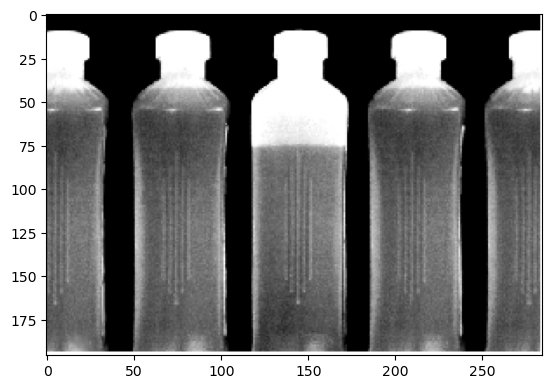

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_gray = cv.imread("imagenes/botellas.tif",cv.IMREAD_GRAYSCALE)

H,W = img_gray.shape
ROW = int(H*3/4) #altura para trazar la linea en Y (horizontal)
searchBottom = 0 #searchBottom = 0 -> no buscas fondo (se utiliza como flag)
y = [] #guardamos las posiciones donde comienzan y terminan las botellas

for j in range(W):
    if searchBottom == 1 and img_gray[ROW,j] <= 50: #detecta si salio de la botella
        y.append(j)
        searchBottom = 0
    elif searchBottom == 0 and img_gray[ROW,j] >= 120 and img_gray[ROW,j] <= 200: #detecta inicio de la botella (pixeles de liquido gris)
        y.append(j)
        searchBottom = 1

#si tam lista es impar significa que hay una botella al final (derecha) la cual esta incompleta
if len(y)%2!=0: 
    y.append(W-1) 
    
numBottles = len(y)//2
print("Cantidad de botellas en la imagen: ", numBottles)

a = [] #guardamos a partir de que pixel comienza el liquido en cada botella(recorriendo de arriba hacia abajo)
for x in range(numBottles):
    column = (y[x*2]+y[x*2+1])//2 #sacamos la posicion Y correspondiente a la mitad de la botella
    for i in range(H):
        if img_gray[i,column] >= 120 and img_gray[i,column] <= 200: #contamos la cantidad de pixeles que corresponden al liquido
            a.append(i)
            break
          
pixelFullBottle = 40 #estimado a partir de la imagen (con el widget)
for x in range(len(a)):
    if a[x] >= (pixelFullBottle):
        b = (H-a[x])/(H - pixelFullBottle) * 100
        if b < 95: #umbral 95%
            print("Botella N° %d no está llena (%f llena)" %(x+1,b))
        else: 
            print("Botella N° %d está llena (%f llena)" %(x+1,b))

plt.imshow(img_gray,cmap='gray',vmax=255,vmin=0)
plt.show()

Guia 2


Ejercicio 4.2:

Al final del proceso de manufactura de placas madres, de marca ASUS modelo A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE. 
Implemente un algoritmo, que a partir de una imagen, determine que tipo de placa es. Haga uso de las tecnicas de realce apendidas y utilice las imagenes a7v600-x.gif y a7v600-SE.gif. Adapte el metodo de forma que contemple el reconocimiento de imagenes que han sido afectadas por un ruido aleatorio impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif ).


In [70]:
import math
def mother_type(img):
    img = img[103:147,198:242]
    imgMean = np.mean(img)
    if(math.isclose(imgMean,38,abs_tol=5)):
        print('es un a7v600-XRI')
    else:
        print('es un a7v600-SERI')

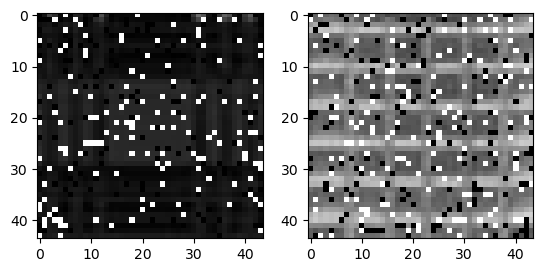

38.56353305785124 124.27376033057851


In [65]:
proc_x = cv.imread('imagenes/a7v600-XRImpulsivo.tiff',cv.IMREAD_GRAYSCALE)
proc_se = cv.imread('imagenes/a7v600-SERImpulsivo.tiff',cv.IMREAD_GRAYSCALE)

#roi de la posicion del procesador
proc_x = proc_x[103:147,198:242]
proc_se = proc_se[103:147,198:242]

fig,ax = plt.subplots(1,2)
ax[0].imshow(proc_x,cmap="gray",vmin=0,vmax=255) 
ax[1].imshow(proc_se,cmap="gray",vmin=0,vmax=255) 
plt.show()
print(np.mean(proc_x),np.mean(proc_se))